Intro: In order to find the best neighborhood in Pittsburgh, we decided to determine which neighborhoods were the most inconvenient to drive in. We looked at speed bumps, permit parking spots, and average daily traffic. We decided that whatever neighborhood is the most annoying to drive in must be the best to walk in, which is healthier anyways. On top of this, more people want to go in the busier neighborhoods, hence more traffic and parking.

The Metric: our metric was the most annoying neighorhood to drive in

I started by importing pandas and numpy, as well as reading in my speed humps csv, a data set containing all the speed humps in Pittsburgh.

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

I then printed out the first 5 rows, in order to show what the data set looks like. As you can see it is not organized by neighborhood but instead just a list of all the speed humps in Pittsburgh.

In [15]:
speedHumps = pd.read_csv("SpeedHumps.csv")

In [16]:
speedHumps.head(5)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


I then grouped by counts of the neighborhood being mentioned in the data set. I printed it out and saw the surprisingly low count of speed humps in each neighborhood. However after thinking about this it makes sense, as I cannot recall actually ever seeing one in Pittsburgh.

In [17]:
humpCount = speedHumps["neighborhood"].value_counts()
humpCount

Squirrel Hill South    18
Carrick                 9
Polish Hill             6
North Oakland           6
Upper Hill              4
Brookline               4
Homewood South          4
South Side Slopes       4
Perry North             4
Garfield                3
Squirrel Hill North     3
South Side Flats        3
Mount Washington        3
Bloomfield              3
Highland Park           2
Central Oakland         1
Stanton Heights         1
Overbrook               1
Name: neighborhood, dtype: int64

Here I put the first 5 into a bar graph, which helps illustrate how many more speed humps squirrel hill south contains when compared to all the other neighborhoods.

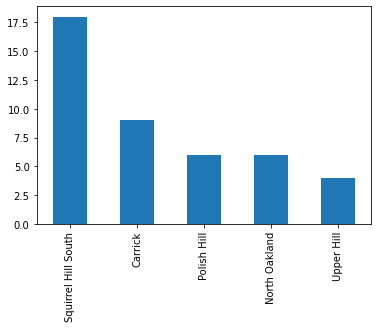

In [18]:
humpCount.head(5).plot(kind = "bar" )

In [19]:

humpCountNormal = humpCount / 18
humpCountNormal

Squirrel Hill South    1.000000
Carrick                0.500000
Polish Hill            0.333333
North Oakland          0.333333
Upper Hill             0.222222
Brookline              0.222222
Homewood South         0.222222
South Side Slopes      0.222222
Perry North            0.222222
Garfield               0.166667
Squirrel Hill North    0.166667
South Side Flats       0.166667
Mount Washington       0.166667
Bloomfield             0.166667
Highland Park          0.111111
Central Oakland        0.055556
Stanton Heights        0.055556
Overbrook              0.055556
Name: neighborhood, dtype: float64

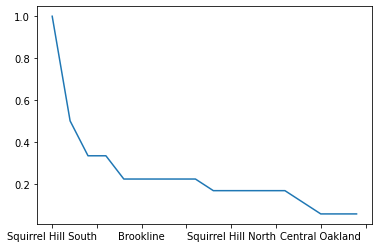

In [20]:
humpCountNormal.plot()

Here I normalized the data to one in order to effectively give them a score of inconvenience, with 1 being the best (most inconvenient), and 0 being the worst(very convenient), then graphed again showing the step drop off between towns.


In [21]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
traffic_data = pd.read_csv("permitparkingpittsburgh.csv")

In [23]:
traffic_data.head(15)

,objectid,area,perimeter,permitpk,permitpk_i,code,neighborhood,number,acres,sqmiles,...,district,code_rpp,code_district,created_user,created_date,last_edited_user,last_edited_date,expiration_date,shape_area,shape_length
0,1661,NaN,1794.414415,3.0,102.0,I,GARFIELD,0.0,2.618,0.000,...,Garifield,I,I - Garifield,pgh.admin,2021-02-23T17:45:48,pgh.admin,2021-02-23T17:45:48,Permit Expires May 1st,3.737608e+05,3059.453089
1,1662,NaN,0.000000,0.0,0.0,CC,SOUTH SIDE FLATS,0.0,31.399,0.000,...,South Side,CC,CC - South Side,pgh.admin,2021-02-23T17:45:48,pgh.admin,2021-02-23T17:45:48,Permit Expires January 1st,1.892114e+06,7149.177081
2,1663,NaN,5103.253204,0.0,0.0,DD,SOUTH SIDE FLATS,0.0,11.785,0.022,...,South Side,DD,DD - South Side,pgh.admin,2021-02-23T17:45:48,pgh.admin,2021-02-23T17:45:48,Permit Expires January 1st,1.799404e+06,9074.841352
3,1664,NaN,4981.569181,8.0,6.0,L,CENTRAL NORTHSIDE,0.0,19.779,0.033,...,North Side,L,L - North Side,pgh.admin,2021-02-23T17:45:48,pgh.admin,2021-02-23T17:45:48,Permit Expires January 1st,8.699288e+05,5146.016086
4,1665,NaN,NaN,NaN,NaN,GG,LAWRENCEVILLE,NaN,NaN,NaN,...,Lawrenceville,GG,GG - Lawrenceville,pgh.admin,2021-02-23T17:45:48,pgh.admin,2021-02-23T17:45:48,Permit Expires March 1st,6.136340e+05,3862.527254
5,1666,NaN,NaN,NaN,NaN,KK,SOUTH SIDE FLATS,NaN,NaN,NaN,...,NaN,KK,KK - South Side Flats,pgh.admin,2021-02-23T17:45:48,pgh.admin,2021-02-23T17:45:48,Permit Expires August 1st,4.278406e+05,2993.209780
6,1667,NaN,0.000000,0.0,0.0,FF,,0.0,0.000,0.000,...,Schenley Farms,FF,FF - Schenley Farms,pgh.admin,2021-02-23T17:45:48,pgh.admin,2021-02-23T17:45:48,Permit Expires February 1st,1.071561e+06,4581.635756
7,1668,NaN,7245.381613,10.0,7.0,F,EAST ALLEGHENY,0.0,49.042,0.077,...,East Allegheny-East North Side,F,F - East Allegheny-East North Side,pgh.admin,2021-02-23T17:45:48,pgh.admin,2021-02-23T17:45:48,Permit Expires February 1st,2.136249e+06,7245.380979
8,1669,NaN,NaN,NaN,NaN,A,LAWRENCEVILLE,NaN,NaN,NaN,...,Lawrenceville,A,A - Lawrenceville,pgh.admin,2021-02-23T17:45:48,pgh.admin,2021-02-23T17:45:48,Permit Expires March 1st,3.770040e+06,10685.607314
9,1670,NaN,12008.154735,2.0,1.0,JJ,BLOOMFIELD,0.0,134.957,0.151,...,Bloomfield,JJ,JJ - Bloomfield,pgh.admin,2021-02-23T17:45:48,pgh.admin,2021-02-23T17:45:48,Permit Expires March 1st,1.985585e+06,6256.529346


In [24]:
permitParking = traffic_data["neighborhood"].value_counts()
permitParking

SHADYSIDE                      6
SQUIRREL HILL NORTH            5
BLOOMFIELD                     4
SOUTH SIDE FLATS               4
WEST OAKLAND                   3
NORTH OAKLAND                  3
CRAWFORD ROBERTS               2
SOUTH OAKLAND                  2
ALLEGHENY WEST                 2
HOMEWOOD SOUTH                 2
FRIENDSHIP                     2
EAST ALLEGHENY                 2
                               2
LAWRENCEVILLE                  2
CENTRAL NORTHSIDE              2
BLUFF                          1
BEECHVIEW                      1
GARFIELD                       1
CENTRAL OAKLAND                1
POINT BREEZE                   1
MT WASHINGTON                  1
SQURREL HILL NORTH &  SOUTH    1
Name: neighborhood, dtype: int64

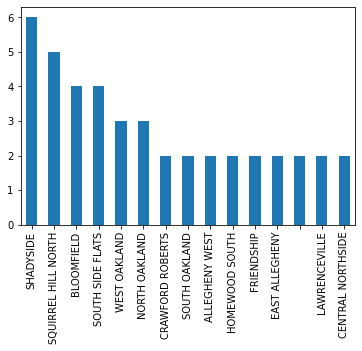

In [25]:
permitParking.head(15).plot(kind = "bar" )

In [36]:
permitAv = permitParking / 6
permitAv

SHADYSIDE                      1.000000
SQUIRREL HILL NORTH            0.833333
BLOOMFIELD                     0.666667
SOUTH SIDE FLATS               0.666667
WEST OAKLAND                   0.500000
NORTH OAKLAND                  0.500000
CRAWFORD ROBERTS               0.333333
SOUTH OAKLAND                  0.333333
ALLEGHENY WEST                 0.333333
HOMEWOOD SOUTH                 0.333333
FRIENDSHIP                     0.333333
EAST ALLEGHENY                 0.333333
                               0.333333
LAWRENCEVILLE                  0.333333
CENTRAL NORTHSIDE              0.333333
BLUFF                          0.166667
BEECHVIEW                      0.166667
GARFIELD                       0.166667
CENTRAL OAKLAND                0.166667
POINT BREEZE                   0.166667
MT WASHINGTON                  0.166667
SQURREL HILL NORTH &  SOUTH    0.166667
Name: neighborhood, dtype: float64

The numbers to the side of each neighborhood represent the total number of areas they assign parking permits. The highest value is 6 in Shadyside so I decided to divide the rest of the numbers by 6 since that was the highest value.

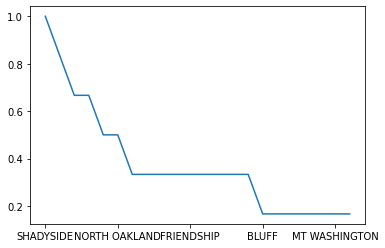

In [37]:
permitAv.plot()

Metric: The metric I chose was traffic data and really liked it because it had alot of data on recorded speeding incidents and what nieghborhood the driver was recorded speeding in. It also had daily car traffic for each nieghborhood over a week period at a time. This allowed me to see which neigborhoods were the busiest amongst traffic along with the particular behaviour of the traffic by looking at the speeding.

In [38]:

import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

traffic_data = pd.read_csv("trafficpittsburgh.csv", 
                                       index_col="id")
df = pd.DataFrame(traffic_data)
dailytraffic = traffic_data["neighborhood"].value_counts()
dailytraffic


Squirrel Hill South    28
Bloomfield             21
Shadyside              18
Highland Park          16
East Liberty           16
                       ..
Allegheny Center        1
Upper Lawrenceville     1
Duquesne Heights        1
Regent Square           1
Crawford-Roberts        1
Name: neighborhood, Length: 74, dtype: int64

In [39]:
trafficcount = dailytraffic / 28
trafficcount

Squirrel Hill South    1.000000
Bloomfield             0.750000
Shadyside              0.642857
Highland Park          0.571429
East Liberty           0.571429
                         ...   
Allegheny Center       0.035714
Upper Lawrenceville    0.035714
Duquesne Heights       0.035714
Regent Square          0.035714
Crawford-Roberts       0.035714
Name: neighborhood, Length: 74, dtype: float64

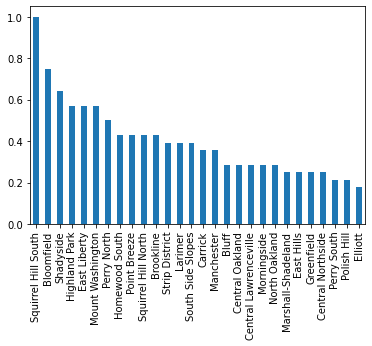

In [40]:
trafficcount.head(28).plot(kind = "bar")

In [108]:
combinedData =  trafficcount.combine(humpCountNormal,max)
combinedData.combine(permitAv,max)
combinedData = combinedData.sort_values()

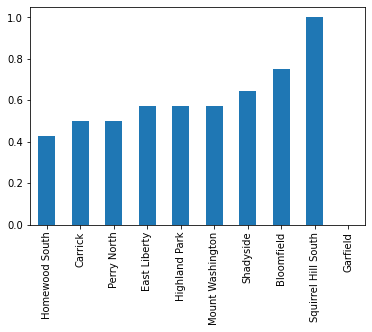

In [110]:

combinedData.tail(10).plot(kind = "bar")

Overall the most inconvinenet 

Conclusion:

Matt's The number of parking permits given out translates to a lack of parking spots available for other drivers passing through. When looking at which areas would be the worst to park in, Shadyside came out as the worst part of Pittsburgh. When comparing my results to my partners results, we determinded that Squirrel Hill is the worst area to drive in. The result is not suprising because Squirrel Hill is a nice area, and a nice area translates to more people going there which makes it harder to park

Tyler's conclusion: By combining the data, we were able to determine Squirrel Hill is the best neighborhood to be in. This is not surprising to me, since it seems to be a nice neighborhood whenever I go there to get dinner or something. The fact Oakland is not higher for traffic surprised me, as it always seems congested and hectic during rush hour.

Luke's Conclusion: Looking at my data we are able to see that Squirrel Hill is the by far the busiest neighborhood and as a result has a much higher rate of speeding instances. Squirrel hill has almost 30% more speeding occurrences in the past 2 years than other nieghborhoods. This makes sense because Squirrel Hill is a very popular nieghborhood and would have the worst and most annoying traffic. Looking at all of our data we can see that Squirrel Hill would be the best nieghborhood because of how annoying the traffic, speed humps and parking permits would be to deal will on a daily basis. 